Import Library
************

In [4]:
import cv2
import imghdr
import os
from keras.preprocessing.image import ImageDataGenerator
import Augmentor
import random
import os
import shutil
from matplotlib import pyplot as plt
from datasets import load_dataset
import pandas as pd

Define Path & All Classes Name
************

In [5]:
data_dir = 'Rocks_Dataset'
balance_dataset_path = "Output_Data/Balanced_Rocks_Dataset"
splited_dataset_path = "Output_Data/Splited_Rocks_Dataset"

# Set your original data directory
train_dir = './Output_Data/Splited_Rocks_Dataset/train'
test_dir = './Output_Data/Splited_Rocks_Dataset/test'
val_dir = './Output_Data/Splited_Rocks_Dataset/validation'


classes = ['Basalt', 'Coal', 'Granite', 'Limestone', 'Marble', 'Quartzite', 'Sandstone']  # Add your class names


Delete Incorrect Format Files 
************

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path)) 

Import Image Dataset Function
************

In [7]:
def import_dataset(path):
    # Set up ImageDataGenerator
    datagen = ImageDataGenerator(rescale=1./255)

    batch_size = 32
    image_size = (224, 224)  # Adjust image size as needed

    dataset = datagen.flow_from_directory(
        path,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        classes=classes,
        shuffle=True,
        seed=42
    )

    return dataset

Count numbers of each class Then return as dictionary object
************

In [8]:
def class_counter(dataset):
    class_indices = dataset.class_indices
    class_counts = dataset.classes

    # Convert class indices to class names
    class_names = {v: k for k, v in class_indices.items()}

    # Count the occurrences of each class
    class_counts_dict = {}
    for count in class_counts:
        class_name = class_names[count]
        class_counts_dict[class_name] = class_counts_dict.get(class_name, 0) + 1

    return class_counts_dict

Bar Graph Display Function For Showing Balance of Data 
************

In [9]:
def display_class_balancing(dataset):
    
    class_counts_dict = class_counter(dataset)
    # Plot the bar chart
    plt.bar(class_counts_dict.keys(), class_counts_dict.values())
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.title('Number of Images in Each Class')
    plt.show()
    print(class_counts_dict.values())

Display Number of Each Class
************

Found 2025 images belonging to 7 classes.


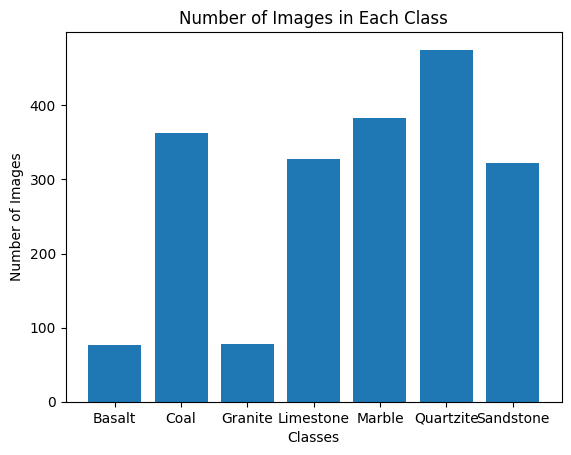

dict_values([77, 363, 78, 327, 383, 475, 322])


In [10]:
original_dataset = import_dataset(data_dir)
display_class_balancing(original_dataset)

Upsampling Image Function
************

In [11]:
def up_sampling(img_dir, amount):

    # Passing the path of the image directory
    p = Augmentor.Pipeline(img_dir ,output_directory='./')
 
    # Defining augmentation parameters and generating 5 samples
    p.flip_left_right(0.5)
    p.black_and_white(0.1)
    p.rotate(0.3, 10, 10)
    p.skew(0.4, 0.5)
    p.zoom(probability = 0.2, min_factor = 1.1, max_factor = 1.5)
    p.sample(amount)

Downsampling Image Function 
************

In [12]:
def down_sampling(img_dir, amount):

    img_list = os.listdir(img_dir)
    
    if amount > len(img_list):
        print("Delete count is greater than the number of image files available.")
        return
    
    # Randomly select 'delete_count' files to delete
    files_to_delete = random.sample(img_list, amount)
    
    print(f"Down Sampling Form {img_dir}")
    # Delete the selected files
    for file in files_to_delete:
        file_path = os.path.join(img_dir, file)
        os.remove(file_path)

Perform Up/Down Sampling to Balance Dataset
************

In [13]:
        
if not os.path.exists(balance_dataset_path):
    shutil.copytree(data_dir ,balance_dataset_path)

    up_sampling(os.path.join(balance_dataset_path, "Basalt"),303)
    up_sampling(os.path.join(balance_dataset_path,"Coal"),17)
    up_sampling(os.path.join(balance_dataset_path,"Granite"),302)
    up_sampling(os.path.join(balance_dataset_path,"Limestone"),53)
    down_sampling(os.path.join(balance_dataset_path,"Marble"),3)
    down_sampling(os.path.join(balance_dataset_path,"Quartzite"),95)
    up_sampling(os.path.join(balance_dataset_path,"Sandstone"),58)

Initialised with 77 image(s) found.
Output directory set to Output_Data/Balanced_Rocks_Dataset\Basalt\./.

Processing <PIL.Image.Image image mode=RGB size=780x520 at 0x1D871334EB0>: 100%|██████████| 303/303 [00:02<00:00, 123.92 Samples/s]                    


Initialised with 363 image(s) found.
Output directory set to Output_Data/Balanced_Rocks_Dataset\Coal\./.

Processing <PIL.Image.Image image mode=RGB size=1024x536 at 0x1D871358A90>: 100%|██████████| 17/17 [00:00<00:00, 291.48 Samples/s]                


Initialised with 78 image(s) found.
Output directory set to Output_Data/Balanced_Rocks_Dataset\Granite\./.

Processing <PIL.Image.Image image mode=RGB size=466x580 at 0x1D871346310>: 100%|██████████| 302/302 [00:04<00:00, 66.60 Samples/s]                     


Initialised with 327 image(s) found.
Output directory set to Output_Data/Balanced_Rocks_Dataset\Limestone\./.

Processing <PIL.Image.Image image mode=RGB size=612x408 at 0x1D871347DC0>: 100%|██████████| 53/53 [00:00<00:00, 100.09 Samples/s]                   


Down Sampling Form Output_Data/Balanced_Rocks_Dataset\Marble
Down Sampling Form Output_Data/Balanced_Rocks_Dataset\Quartzite
Initialised with 322 image(s) found.
Output directory set to Output_Data/Balanced_Rocks_Dataset\Sandstone\./.

Processing <PIL.Image.Image image mode=RGB size=612x408 at 0x1D8713585E0>: 100%|██████████| 58/58 [00:01<00:00, 39.42 Samples/s]                    


Display Number of Each Class After Balancing
************

Found 2660 images belonging to 7 classes.


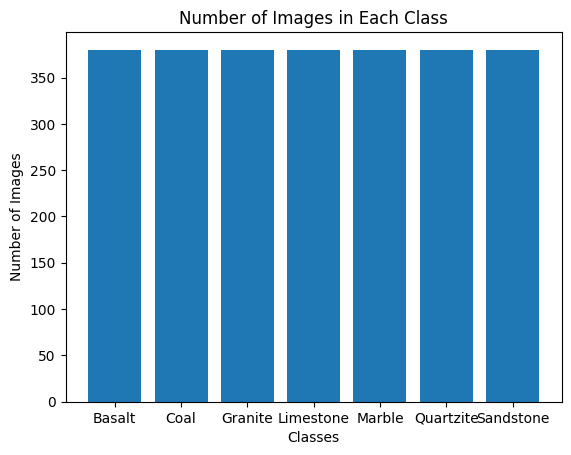

dict_values([380, 380, 380, 380, 380, 380, 380])


In [14]:
balance_dataset = import_dataset(balance_dataset_path)
display_class_balancing(balance_dataset)

Split Dataset to Test,Trian,Validation Function
************

In [15]:
def split_dataset(input_dir, output_dir, train_ratio=0.7, validation_ratio=0.2, seed=None):
    if seed is not None:
        random.seed(seed)

    # Create output directories for training, validation, and testing
    train_dir = os.path.join(output_dir, 'train')
    validation_dir = os.path.join(output_dir, 'validation')
    test_dir = os.path.join(output_dir, 'test')

    os.makedirs(train_dir, exist_ok=True)
    os.makedirs(validation_dir, exist_ok=True)
    os.makedirs(test_dir, exist_ok=True)

    # Iterate over class directories
    for class_name in os.listdir(input_dir):
        class_dir = os.path.join(input_dir, class_name)

        if os.path.isdir(class_dir):
            # List all image files in the class directory
            images = [img for img in os.listdir(class_dir)]
   
            # Shuffle the list of images
            random.shuffle(images)

            # Calculate the number of images for training, validation, and testing
            train_index = int(len(images) * train_ratio)
            validation_index = int(len(images) * (train_ratio + validation_ratio))

            # Split the images into training, validation, and testing sets
            train_images = images[:train_index]
            validation_images = images[train_index:validation_index]
            test_images = images[validation_index:]

            # Copy images to the appropriate directories
            for img in train_images:
                src_path = os.path.join(class_dir, img)
                dest_path = os.path.join(train_dir, class_name, img)
                os.makedirs(os.path.dirname(dest_path), exist_ok=True)
                shutil.copy(src_path, dest_path)

            for img in validation_images:
                src_path = os.path.join(class_dir, img)
                dest_path = os.path.join(validation_dir, class_name, img)
                os.makedirs(os.path.dirname(dest_path), exist_ok=True)
                shutil.copy(src_path, dest_path)

            for img in test_images:
                src_path = os.path.join(class_dir, img)
                dest_path = os.path.join(test_dir, class_name, img)
                os.makedirs(os.path.dirname(dest_path), exist_ok=True)
                shutil.copy(src_path, dest_path)

Perform Dataset Test/Train/Val Spliting
************

In [16]:
#input,output path define
input_directory = balance_dataset_path
output_directory = splited_dataset_path

#call split_dataset function
split_dataset(input_directory, output_directory, train_ratio=0.7, validation_ratio=0.2, seed=42)

Import Splited Dataset
************

In [21]:
train_data = import_dataset(train_dir)
test_data = import_dataset(test_dir)
val_data = import_dataset(val_dir)

Found 1863 images belonging to 7 classes.
Found 272 images belonging to 7 classes.
Found 525 images belonging to 7 classes.


Display Number of Each Class With Partitioning
******

Text(0, 0.5, 'count')

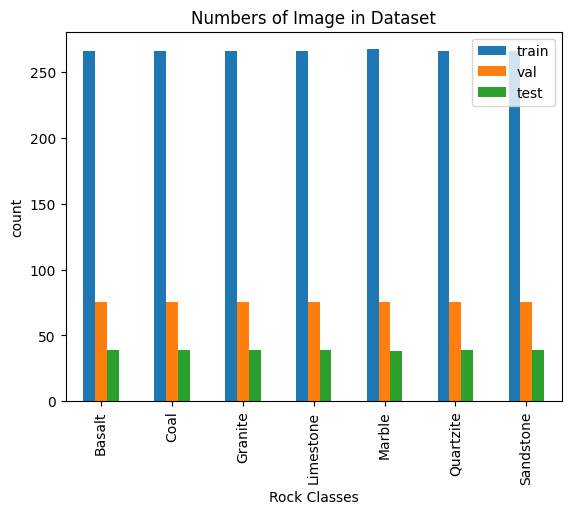

In [23]:
data = pd.DataFrame({
    "train": class_counter(train_data).values(),
    "val": class_counter(val_data).values(),
    "test": class_counter(test_data).values()
    },
    index = classes
)

data.plot(kind="bar")
plt.title("Numbers of Image in Dataset")
plt.xlabel("Rock Classes")
plt.ylabel("count")